## BSITCO1/0416/2020 GITAU GRACE NJERI
### RAIN PREDICTION WITH PYTHON

### 1. Importing Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load dataset

rain = pd.read_csv("weatherDataset.csv")
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/12/2008,Airbase,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02/12/2008,Airbase,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03/12/2008,Airbase,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04/12/2008,Airbase,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05/12/2008,Airbase,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# Get unique locations
unique_locations = rain['Location'].unique()

# Display the unique locations
unique_locations

array(['Airbase', 'BabaDogo', 'ClayCity', 'Embakasi', 'Karen', 'Karura',
       'NairobiCentral', 'NairobiSouth', 'NairobiWest', 'Ruai', 'SouthC',
       'UmojaI', 'UmojaIi', 'UpperSavannah', 'Utalii', 'Utawala',
       'UthiruRuthimitu', 'Njiru', 'Pangani', 'Ngara', 'Mwiki',
       'ParklandsHighridge', 'Pumwani', 'Riruta', 'Roysambu',
       'Sarangombe', 'Viwandani', 'DandoraAreaI', 'DandoraAreaIi',
       'DandoraAreaIii', 'DandoraAreaIv', 'EastleighNorth',
       'EastleighSouth', 'Gatina', 'Githurai', 'Harambee', 'Kahawa',
       'KahawaWest', 'KariobangiNorth', 'KariobangiSouth',
       'KayoleCentral', 'KayoleNorth', 'KayoleSouth', 'Kileleshwa',
       'WoodleyKenyattaGolfCourse', 'Waithaka', 'Zimmerman',
       'ZiwaniKariokor'], dtype=object)

In [4]:
#Checking dimensions of the dataset
print(rain.shape)

(145460, 23)


### 2. Data preprocessing

In [5]:
#concise summary of the dataset
print(rain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
#generate descriptice statistics for the dataset
print(rain.describe(exclude=[object]))

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

In [7]:
print(rain.describe(include=[object]))

              Date   Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       145460     145460      135134     134894     141232    142199   
unique        3436         48          16         16         16         2   
top     12/11/2013  Viwandani           W          N         SE        No   
freq            49       6018        9915      11758      10838    110319   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316  


### 3. Finding categorical and numerical features in the dataset.

In [8]:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [9]:
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


### 4. Cardinality check for categorical features:
Cardinality: The number of unique values in each categorical feature.

In [10]:
for each_feature in categorical_features:
   unique_values = len(rain[each_feature].unique())
   print("Cardinality(no. of unique values) of {} are: {}".format(each_feature, unique_values))

Cardinality(no. of unique values) of Date are: 3436
Cardinality(no. of unique values) of Location are: 48
Cardinality(no. of unique values) of WindGustDir are: 17
Cardinality(no. of unique values) of WindDir9am are: 17
Cardinality(no. of unique values) of WindDir3pm are: 17
Cardinality(no. of unique values) of RainToday are: 3
Cardinality(no. of unique values) of RainTomorrow are: 3


Date column has high cardinality which poses several problems to the model in terms of efficiency and also dimensions of data increase when encoded to numerical data.

In [11]:
# Feature Engineering of Date column to decrease high cardinality:

rain['Date'] = pd.to_datetime(rain['Date'])
rain['year'] = rain['Date'].dt.year
rain['month'] = rain['Date'].dt.month
rain['day'] = rain['Date'].dt.day

C:\Users\Han\AppData\Local\Temp\ipykernel_2856\2411382455.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  rain['Date'] = pd.to_datetime(rain['Date'])


In [12]:
#Drop Date column:
rain.drop('Date', axis = 1, inplace = True)
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Airbase,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,1,12
1,Airbase,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,2,12
2,Airbase,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,3,12
3,Airbase,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,4,12
4,Airbase,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,5,12


### 5. Handling missing values

In [13]:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
rain[categorical_features].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [14]:
#Imputing the missing values in categorical features using the most frequent value which is mode:
categorical_features_with_null = [feature for feature in categorical_features if rain[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = rain[each_feature].mode()[0]
    rain[each_feature].fillna(mode_val,inplace=True)

In [15]:
# Handling Missing values in Numerical features:
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
rain[numerical_features].isnull().sum()


MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
year                 0
month                0
day                  0
dtype: int64

### 6. Outliers detection and treatment:

In [16]:
# Outlier Treatment to remove outliers from Numerical Features:
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = rain[feature].quantile(0.25)
    q3 = rain[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    rain.loc[rain[feature]<lower_limit,feature] = lower_limit
    rain.loc[rain[feature]>upper_limit,feature] = upper_limit

In [17]:
#Now, numerical features are free from outliers. I'll impute missing values in numerical features using mean.
numerical_features_with_null = [feature for feature in numerical_features if rain[feature].isnull().sum()]
for feature in numerical_features_with_null:
    mean_value = rain[feature].mean()
    rain[feature].fillna(mean_value,inplace=True)

### 9. Exploratory Data Analysis:
EDA is a technique used to analyze, visualize, investigate, interpret, discover and summarize data. It helps Data Scientists to extract trends, patterns, and relationships in data.

#### 1. Univariate Analysis:
a) Exploring target variable:

<Axes: >

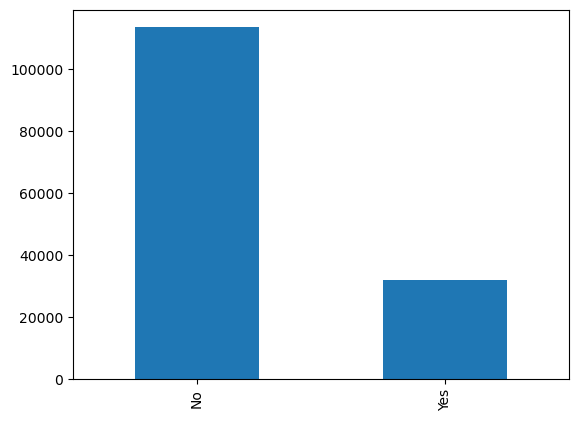

In [18]:
rain['RainTomorrow'].value_counts().plot(kind='bar')


#### 2. Bi-variate Analysis:
a) Sunshine vs Rainfall:

<Axes: xlabel='Sunshine', ylabel='Rainfall'>

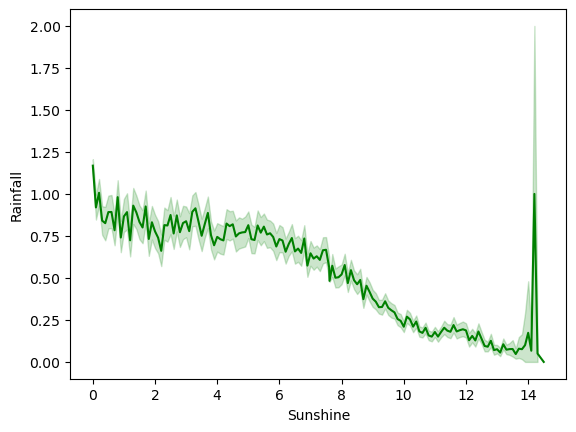

In [19]:
sns.lineplot(data=rain,x='Sunshine',y='Rainfall',color='green')

In the above line plot, the Sunshine feature is inversely proportional to the Rainfall feature.

#### b) Sunshine vs Evaporation:

<Axes: xlabel='Sunshine', ylabel='Evaporation'>

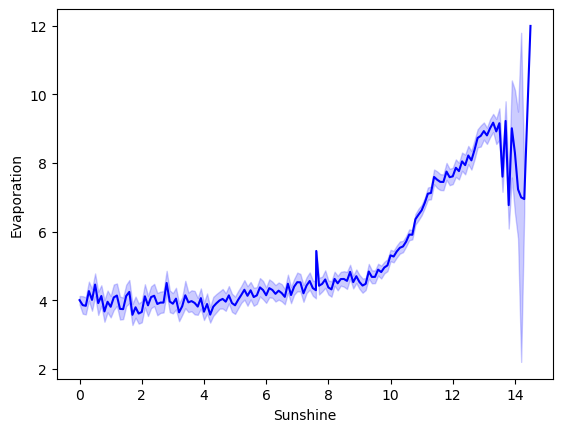

In [20]:
sns.lineplot(data=rain,x='Sunshine',y='Evaporation',color='blue')


In the above line plot, the Sunshine feature is proportional to the Evaporation feature.



#### 3. Multivariate Analysis:

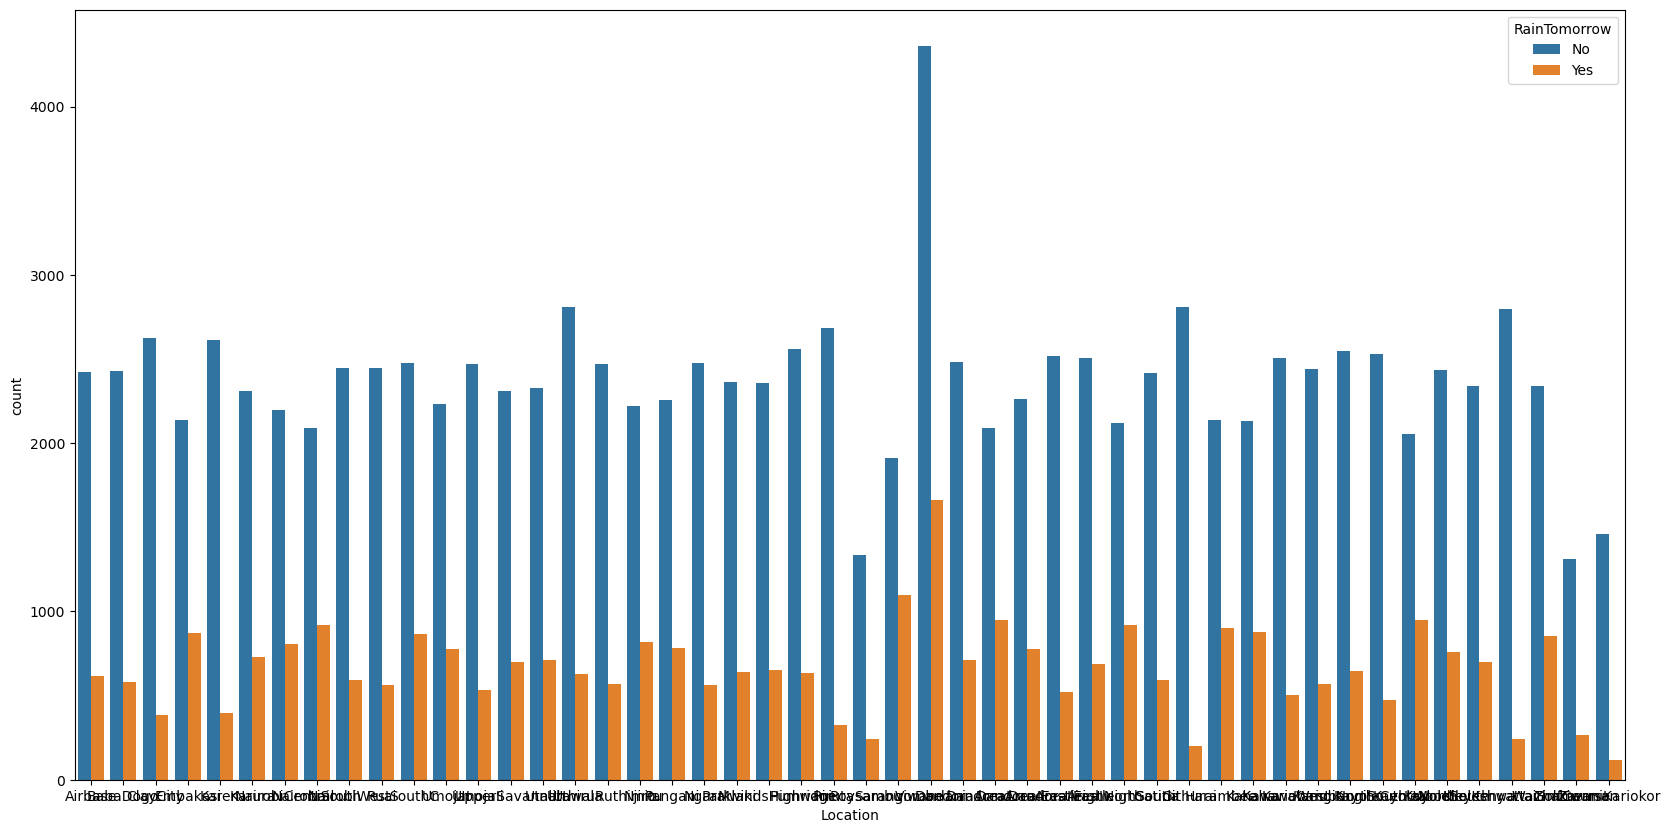

In [21]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Location", hue="RainTomorrow", data=rain)

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

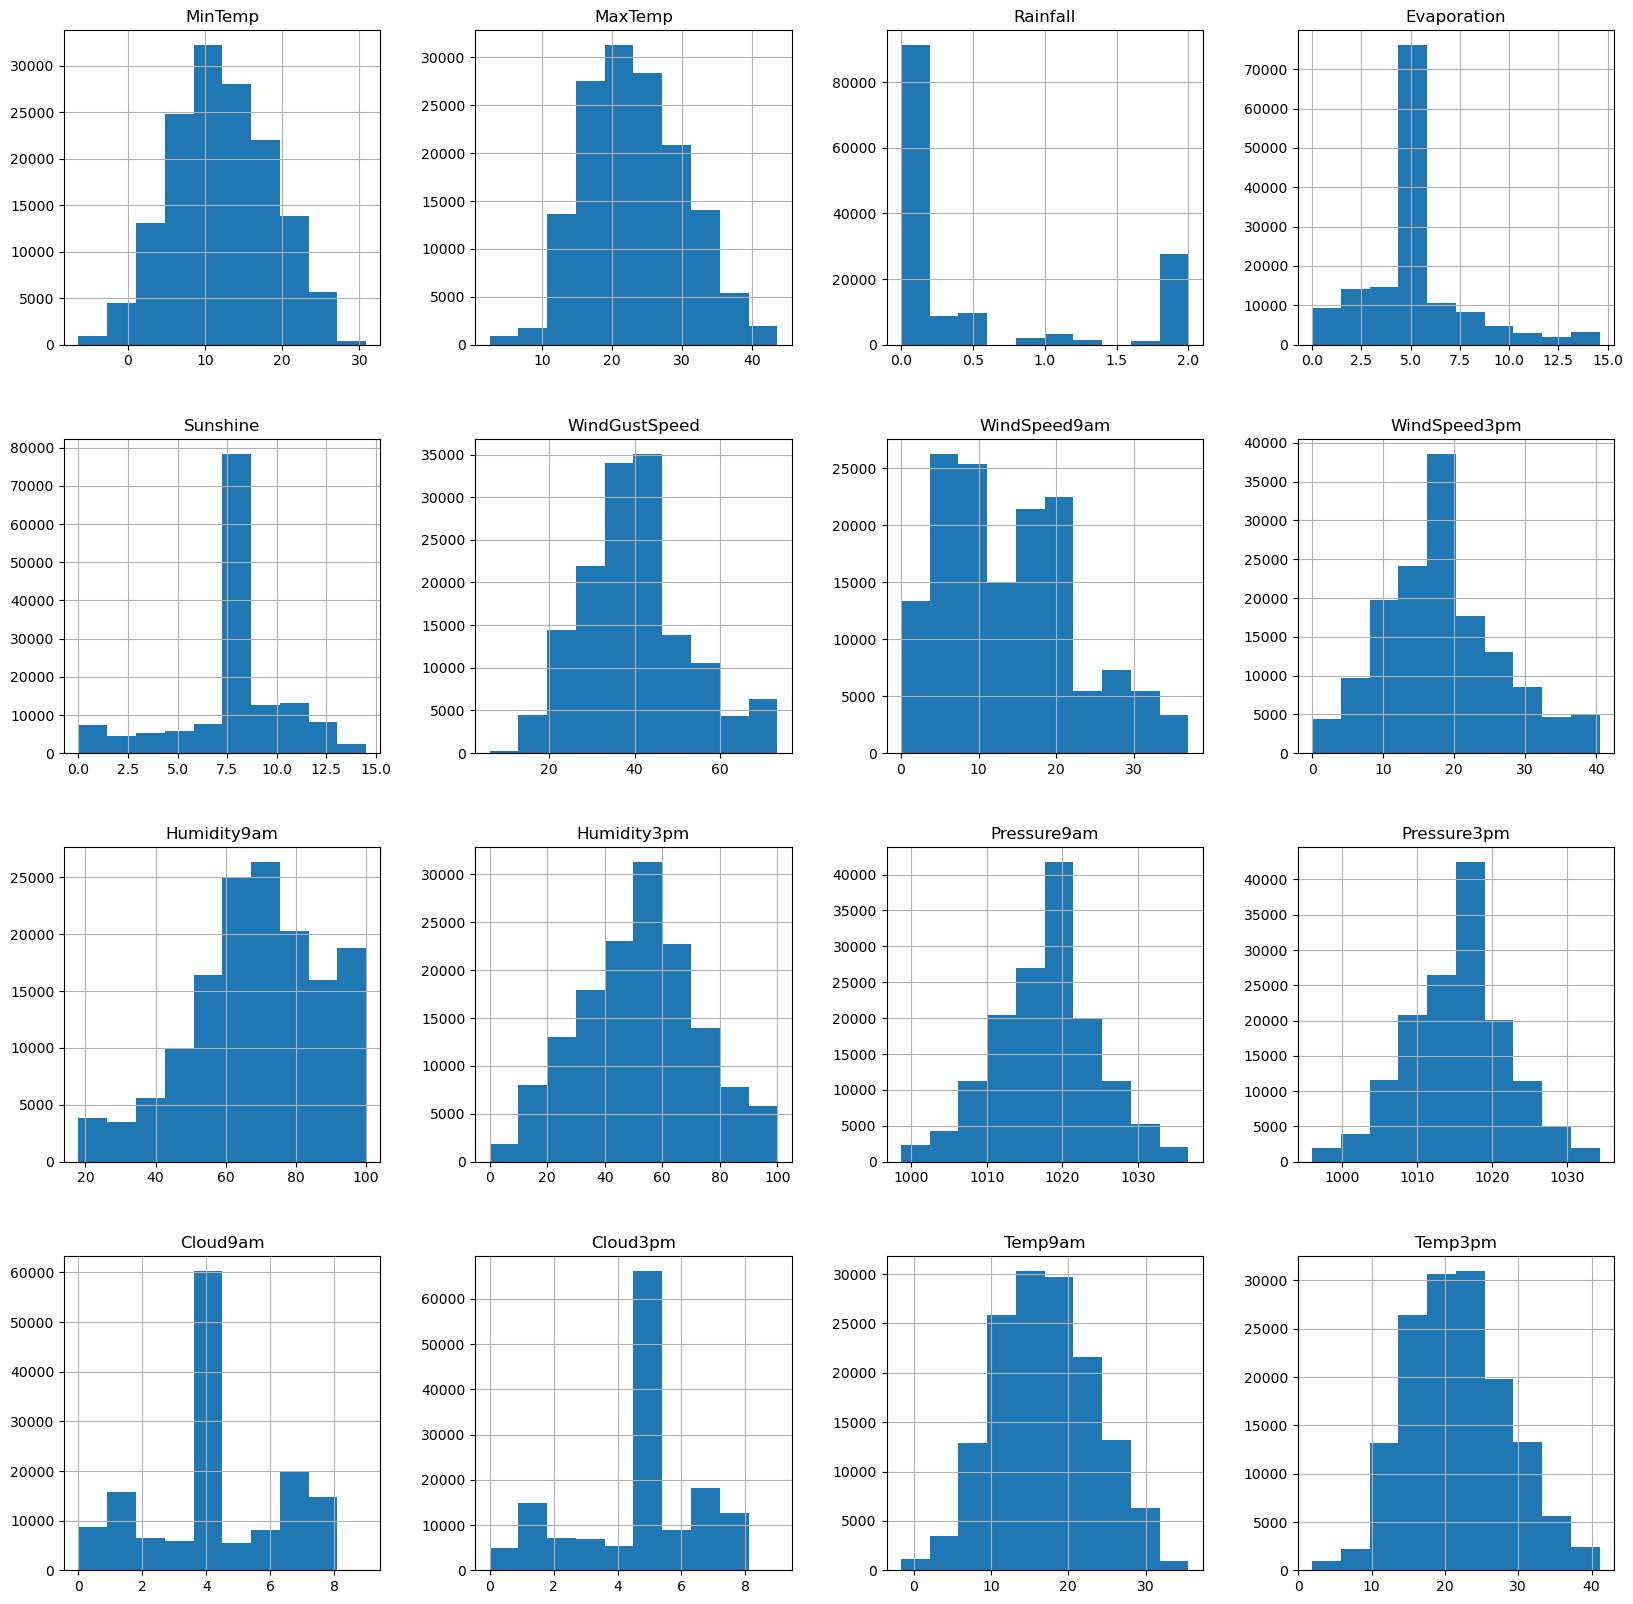

In [22]:
num_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
rain[num_features].hist(bins=10,figsize=(20,20))

### 8.  Encoding of Categorical Features:
Most Machine Learning Algorithms like Logistic Regression, Support Vector Machines, K Nearest Neighbours, etc. can’t handle categorical data. Hence, these categorical data need to converted to numerical data for modeling, which is called  Feature Encoding.
I will be using replace() function to encode categorical data to numerical data.

In [23]:
def encode_data(feature_name):

    ''' 

    This function takes feature name as a parameter and returns mapping dictionary to replace(or map) categorical data with numerical data.

    '''

    mapping_dict = {}

    unique_values = list(rain[feature_name].unique())

    for idx in range(len(unique_values)):

        mapping_dict[unique_values[idx]] = idx

    return mapping_dict




rain['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

rain['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

rain['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

rain['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

rain['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

rain['Location'].replace(encode_data('Location'), inplace = True)

rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.9,0.6,5.318667,7.611178,0,44.0,0,0,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,1,12
1,0,7.4,25.1,0.0,5.318667,7.611178,1,44.0,1,1,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,2,12
2,0,12.9,25.7,0.0,5.318667,7.611178,2,46.0,0,1,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,3,12
3,0,9.2,28.0,0.0,5.318667,7.611178,3,24.0,2,2,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,4,12
4,0,17.5,32.3,1.0,5.318667,7.611178,0,41.0,3,3,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,5,12


### 9. Correlation

<Axes: >

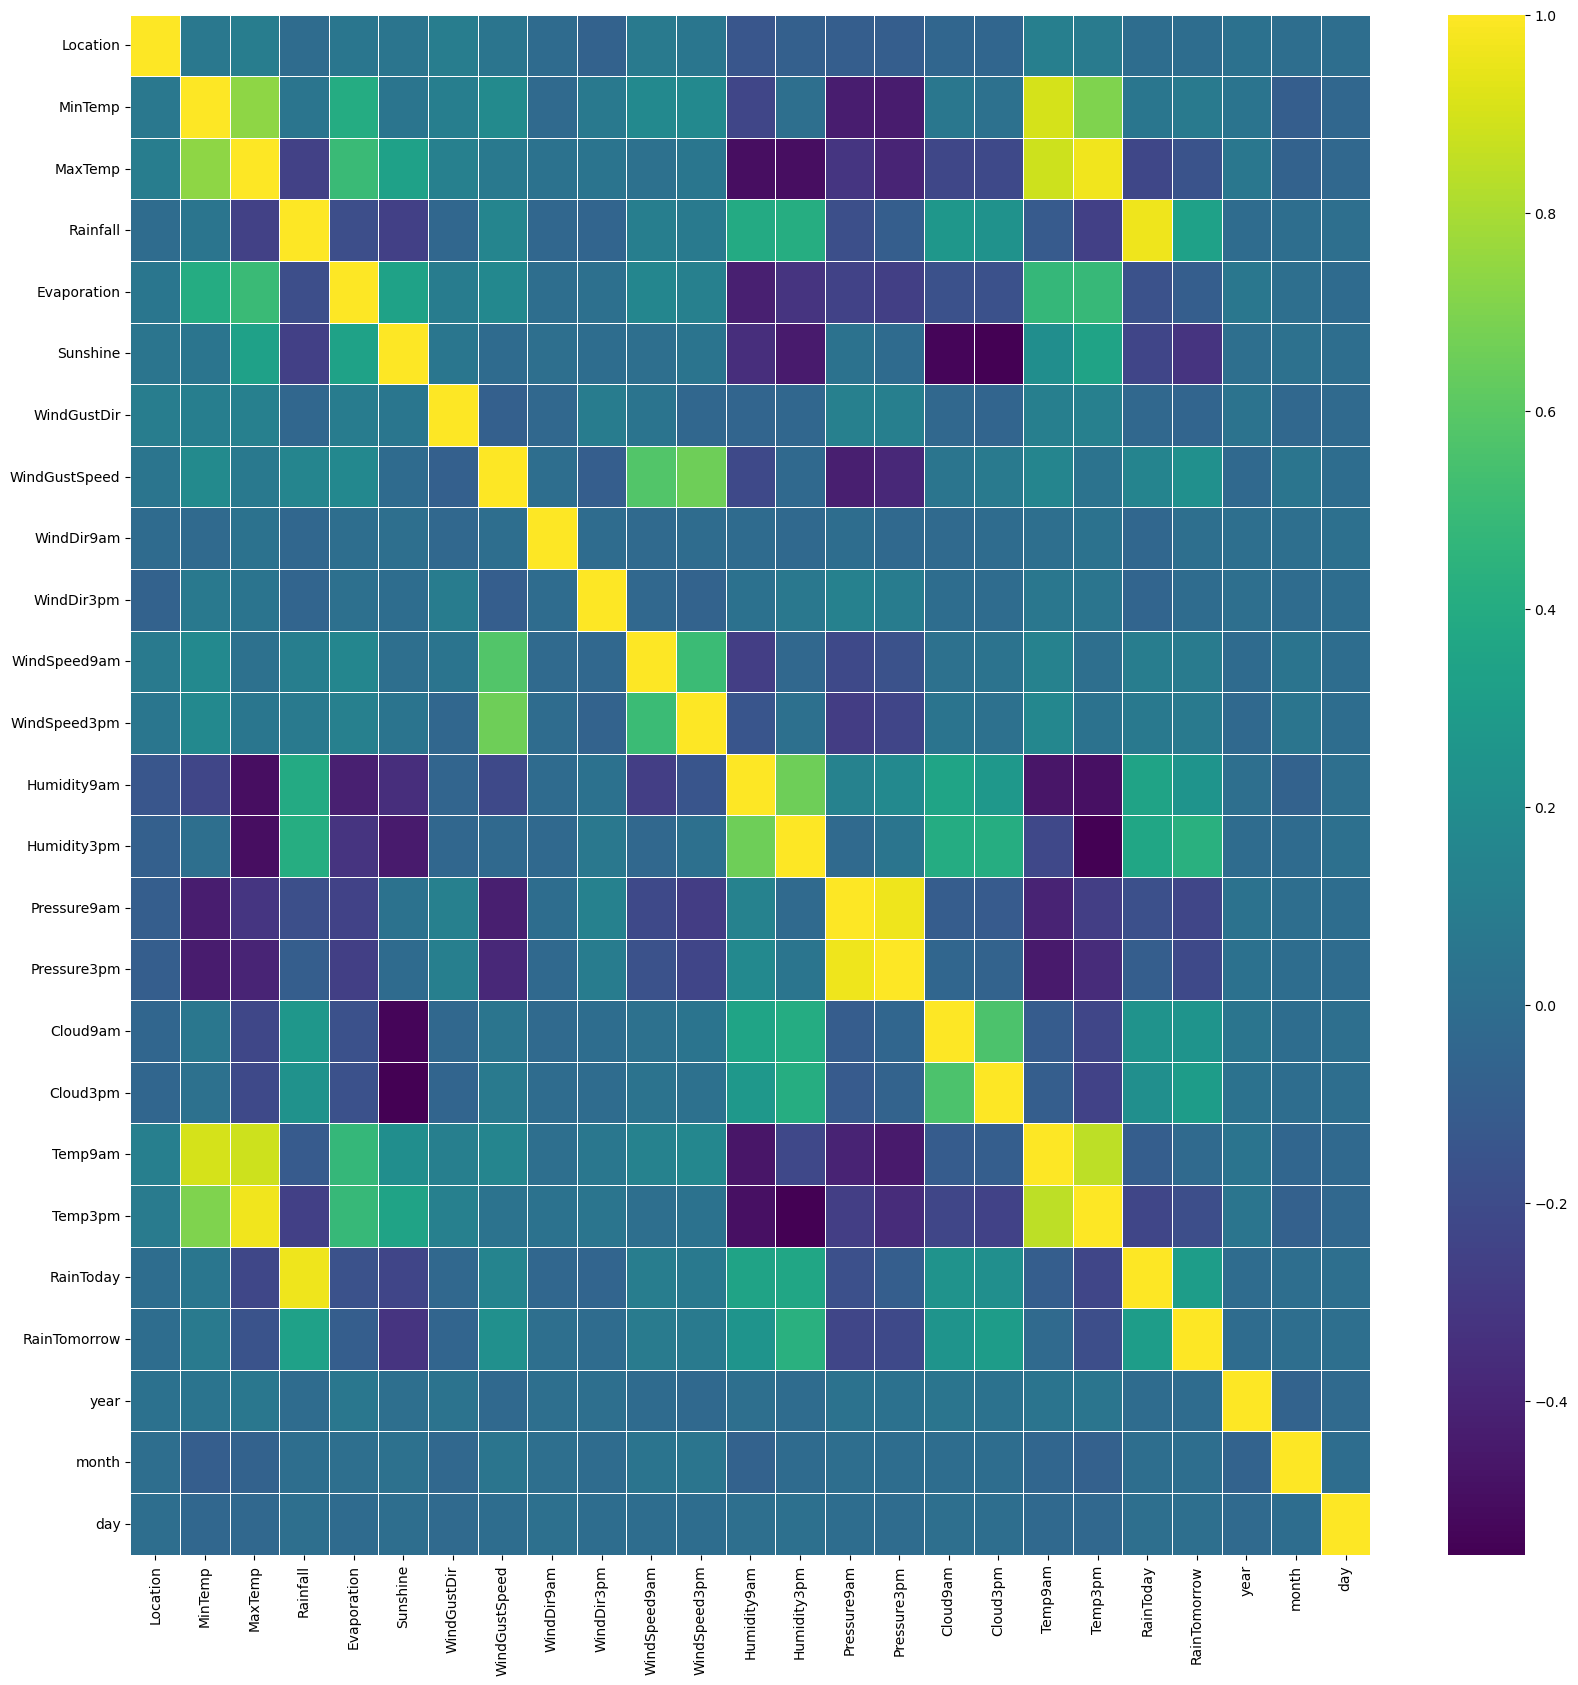

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(rain.corr(), linewidths=0.5, annot=False, fmt=".2f", cmap = 'viridis')

In [25]:
# Splitting data into Independent Features and Dependent Features:
X = rain.drop(['RainTomorrow'],axis=1) #Independent/Input features
y = rain['RainTomorrow'] #Dependent features/Target label

### 10. Feature Importance
Machine Learning Model performance depends on features that are used to train a model. Feature importance describes which features are relevant to build a model. Feature Importance refers to the techniques that assign a score to input/label features based on how useful they are at predicting a target variable. Feature importance helps in Feature Selection.
I’ll be using ExtraTreesRegressor class for Feature Importance. This class implements a meta estimator that fits a number of randomized decision trees on various samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [26]:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_

array([0.03483799, 0.03018129, 0.0291681 , 0.04346736, 0.02338295,
       0.04361359, 0.03003651, 0.05556434, 0.03038063, 0.03158848,
       0.03098171, 0.03240161, 0.03702606, 0.19600089, 0.03605764,
       0.0507782 , 0.02426147, 0.03769983, 0.02819523, 0.02839161,
       0.05270457, 0.03081198, 0.03092618, 0.03154179])

<Axes: >

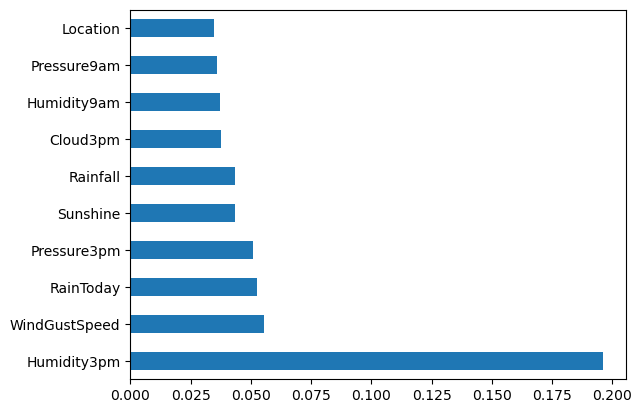

In [27]:
# visualize feature importance values:
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [28]:
feature_imp

Location         0.034838
MinTemp          0.030181
MaxTemp          0.029168
Rainfall         0.043467
Evaporation      0.023383
Sunshine         0.043614
WindGustDir      0.030037
WindGustSpeed    0.055564
WindDir9am       0.030381
WindDir3pm       0.031588
WindSpeed9am     0.030982
WindSpeed3pm     0.032402
Humidity9am      0.037026
Humidity3pm      0.196001
Pressure9am      0.036058
Pressure3pm      0.050778
Cloud9am         0.024261
Cloud3pm         0.037700
Temp9am          0.028195
Temp3pm          0.028392
RainToday        0.052705
year             0.030812
month            0.030926
day              0.031542
dtype: float64

### 11. Splitting Data into training and testing set:

In [29]:
#train_test_split() is a method of model_selection class used to split data into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [30]:
#Length of Training and Testing set:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 116368
Length of Testing Data: 29092


### 12. Feature Scaling:
Feature Scaling is a technique used to scale, normalize, standardize data in range(0,1). When each column of a dataset has distinct values, then it helps to scale data of each column to a common level. StandardScaler is a class used to implement feature scaling.



In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 13. Model Building:

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#### (i) Logistic Regression
Model Training

In [33]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(solver='liblinear', random_state=0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

Model Testing:

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 

print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8440464732572529


Checking for Overfitting and Under Fitting:

In [36]:
print("Train Data Score: {}".format(classifier.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier.score(X_test, y_test)))

Train Data Score: 0.8438488244190843
Test Data Score: 0.8440464732572529


In [37]:
# confusion Matrix:
print("Confusion Matrix:")
print("\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:

 [[21534  1192]
 [ 3345  3021]]


In [38]:
# Classification Report:
print("classification_report:")
print("\n",classification_report(y_test,y_pred))

classification_report:

               precision    recall  f1-score   support

           0       0.87      0.95      0.90     22726
           1       0.72      0.47      0.57      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



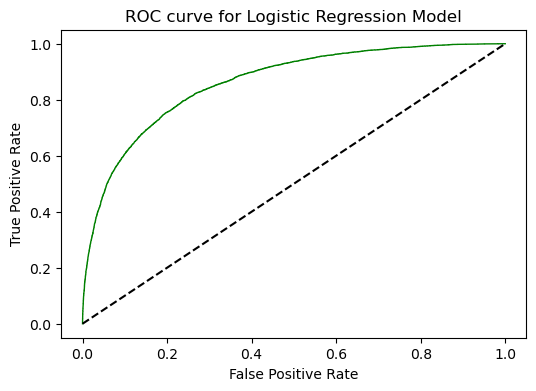

In [39]:
# Receiver operating characteristic(ROC) curve:
# predicting probabilities:
y_pred_logreg_proba = classifier.predict_proba(X_test)

# Finding True Positive Rate(tpr), False Positive Rate(fpr), threshold values to plot ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])

# Plotting ROC curve:
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [40]:
#Finding whether model performance can be improved using Cross Validation Score:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.84321561 0.84278594 0.84673885 0.84179092 0.84376746]
Average cross-validation score: 0.8436597538744726


The mean accuracy score of cross validation is almost same like original model accuracy score which is 0.8445. So, accuracy of model may not be improved using Cross-validation.

#### (ii) Random Forest


In [41]:
from sklearn.ensemble import RandomForestClassifier

Model Training

In [42]:
classifier_rf=RandomForestClassifier()
classifier_rf.fit(X_train,y_train)

RandomForestClassifier()

Model Testing

In [43]:
y_pred_rf = classifier_rf.predict(X_test)
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_rf)))

Accuracy Score: 0.8571428571428571


Checking for Overfitting and Under Fitting:

In [44]:
print("Train Data Score: {}".format(classifier_rf.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_rf.score(X_test, y_test)))

Train Data Score: 0.9999828131445071
Test Data Score: 0.8571428571428571


In [45]:
# confusion Matrix:
print("Confusion Matrix:")
print("\n",confusion_matrix(y_test,y_pred_rf))

Confusion Matrix:

 [[21764   962]
 [ 3194  3172]]


In [47]:
# Classification Report:
print("classification_report:")
print("\n",classification_report(y_test,y_pred_rf))

classification_report:

               precision    recall  f1-score   support

           0       0.87      0.96      0.91     22726
           1       0.77      0.50      0.60      6366

    accuracy                           0.86     29092
   macro avg       0.82      0.73      0.76     29092
weighted avg       0.85      0.86      0.85     29092



Accuracy score for Training Set is almost 1 or 100%, which is quite uncommon. And testing accuracy is 0.85. It seems like model is overfitting, because the generalization for unseen data is not that accurate, when compared with seen data and difference between training - testing accuracy is not minimum.

#### (iii) XGBoost 

In [56]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
y_pred_xgb = xgb.predict(X_test)
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_xgb)))

Accuracy Score: 0.8596521380448233


In [63]:
print("Train Data Score: {}".format(xgb.score(X_train, y_train)))
print("Test Data Score: {}".format(xgb.score(X_test, y_test)))

Train Data Score: 0.8921267014986938
Test Data Score: 0.8596521380448233


In [64]:
# confusion Matrix:
print("Confusion Matrix:")
print("\n",confusion_matrix(y_test,y_pred_xgb))

# Classification Report:
print("classification_report:")
print("\n",classification_report(y_test,y_pred_xgb))

Confusion Matrix:

 [[21494  1232]
 [ 2851  3515]]
classification_report:

               precision    recall  f1-score   support

           0       0.88      0.95      0.91     22726
           1       0.74      0.55      0.63      6366

    accuracy                           0.86     29092
   macro avg       0.81      0.75      0.77     29092
weighted avg       0.85      0.86      0.85     29092



### 14. Results and Conclusion:


Best Models in terms of accuracy (In my Experiment):
1) Random Forest
2) Logistic Regression

Best Models in terms of Computation Time (In my Experiment):
1) Logistic Regression
2) Random Forest

Comparison Table:

In [71]:
# Create and display the comparison table
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [lr_accuracy, rf_accuracy, xgb_accuracy],
    'Precision': [lr_precision, rf_precision, xgb_precision],
    'Recall': [lr_recall, rf_recall, xgb_recall],
    'F1-Score': [lr_f1, rf_f1, xgb_f1]
}

df = pd.DataFrame(data)
print(df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.844046   0.717066  0.474552  0.571131
1        Random Forest  0.857143   0.767296  0.498272  0.604190
2              XGBoost  0.859652   0.740468  0.552152  0.632592


Conclusion:

The accuracy score of XGBoost is high when compared with accuracy scores of Logistic Regression and Random Forest.

### 15. Saving the Model

In [75]:
import pickle 
pickle_out = open("C:/Users/Han/xgb.pkl", mode = "wb") 
pickle.dump(xgb, pickle_out) 
pickle_out.close()